<a href="https://colab.research.google.com/github/bablushaw23/BingAPI-Image-collection-and-CNN-train/blob/master/gatherImagesFromBingAPIThenTrainUsingCNNWith93_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aqquiring dataset
Here i am using Bing's API to gather images. To get it:

*   Access Azure cognitive services through [link](https://azure.microsoft.com/en-us/try/cognitive-services/?apiSlug=search-api-v7&country=India&allowContact=true&unauthorized=1#_=_)
*   Find Search API tab

*   There you'll find bing Search API v7
*   It includes image search
* Go and aquire your API key





**Imports**

In [0]:
#import statements
import requests
from matplotlib import pyplot
from requests import exceptions
import os

**My private keys and settings**

In [0]:
API_KEY = "ee402fbf91ba438a961ee37f6f99ebeb"       # my API key, (might be expire now)
MAX_RESULTS = 30
GROUP_SIZE = 10
URL = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
ACCEPTABLE_FILE_SIZE=1024   #bytes


**Making parent directory of all downloaded images**

*  This will make a directory under content folder within google colab home directory.




  



In [0]:
directory='RawDatasets'
if not os.path.exists(directory):
  os.makedirs(directory)

In [9]:
ACTORS=['shahrukh khan', 'akshay kumar', 'aamir khan', 'salman khan', 'ayushmann khurrana', 'ranveer singh',
       'Narendra modi','Donald trump', 'Mukesh ambani','A R rahman','Arijit singh', 'M S Dhoni','Virat kohli',
       'Arun jetley','Sachin tendulkar']
len(ACTORS)

15

In [0]:

EXCEPTIONS = set([IOError, FileNotFoundError,
	exceptions.RequestException, exceptions.HTTPError,
	exceptions.ConnectionError, exceptions.Timeout])



ACTORS=['shahrukh khan', 'akshay kumar', 'aamir khan', 'salman khan', 'ayushmann khurrana', 'ranveer singh',
       'Narendra modi','Donald trump', 'Mukesh ambani','A R rahman','Arijit singh', 'M S Dhoni','Virat kohli',
       'Arun jetley','Sachin tendulkar']

for actor in ACTORS:  
  term = actor
  if not os.path.exists(directory+'/'+term):
    os.makedirs(directory+'/'+term)
  
  headers = {"Ocp-Apim-Subscription-Key" : API_KEY}
  params = {"q": term, "offset": 0, "count": GROUP_SIZE}

  # make the search
  print("\nSearching Bing API for '{}'".format(term))
  search = requests.get(URL, headers=headers, params=params)
  search.raise_for_status()

  # grab the results from the search, including the total number of
  # estimated results returned by the Bing API
  results = search.json()
  estNumResults = min(results["totalEstimatedMatches"], MAX_RESULTS)
  print("Found {} results for '{}'.".format(estNumResults,term))
  total = 0
  for offset in range(0, estNumResults, GROUP_SIZE):
    print("Making request for group {}-{} of {}...".format(offset, offset + GROUP_SIZE,
                                                                  estNumResults))
    params["offset"] = offset	  
    search = requests.get(URL, headers=headers, params=params)
    search.raise_for_status()
    results = search.json()
	  
	  #print("Saving images for group {}-{} of {}...".format(
		# offset, offset + GROUP_SIZE, estNumResults))
    
    for v in results["value"]:
      
      try:
        r = requests.get(v["contentUrl"], timeout=30)
        ext = v["contentUrl"][v["contentUrl"].rfind("."):]
			   # build the path to the output image
			  
        filename = os.path.sep.join([directory,term, "{}{}".format(str(total).zfill(8), ext)])

			   # write the image to disk
        f = open(filename, "wb")
        f.write(r.content)
        f.close()

		  # catch any errors that would not unable us to download the image
      except Exception as e:
        if type(e) in EXCEPTIONS:
          print("Skipping this for  error")
          continue
      
      if os.path.getsize(filename)<ACCEPTABLE_FILE_SIZE or :
        os.remove(filename)
        continue
      
      
      total+=1 
print("\nAll processes fetching done...")

# **Cropping only to face**
For this i am using MTCNN packages.

Downloading MTCNN

In [0]:
!pip3 install MTCNN

In [0]:
!rm -r cropped_faces

Imports

In [0]:
from mtcnn.mtcnn import MTCNN

In [0]:
def save_faces(directory):    
    dest='cropped_faces'
    passed=[]
    failed=[]
    totalFiles=0
    detector = MTCNN()
    for Dir in os.listdir(directory):
        aDir=os.path.join(directory, Dir)
        print("In directory: "+Dir)
        for file in os.listdir(aDir):            
            aFile=os.path.join(aDir, file)
            if os.path.isfile(aFile):                
                totalFiles+=1
                # load image from file
                
                try:
                    pixels = pyplot.imread(aFile)
                    # detect faces in the image
                    faces = detector.detect_faces(pixels)

                    # display faces on the original image
                    #print(aFile)
                    
                    for face in range(len(faces)):
                        x1,y1,width,height=faces[face]['box']
                        x2,y2=x1+width, y1+height
                        x1=abs(x1)
                        x2=abs(x2)
                        y1=abs(y1)
                        y2=abs(y2)
                        dest_dir=os.path.join(dest, Dir)
                        if not os.path.exists(dest_dir):
                            os.makedirs(dest_dir)
                        pyplot.imsave( dest_dir+'/'+str(face)+file, pixels[y1:y2, x1:x2])                    
                    passed.append(aFile)
                except:
                    failed.append(aFile)
    print("Printing failed list..............")
    print(failed)
    print("Printed failed list..............")
    print("Total files: ",totalFiles)
    print("Passed: ",len(passed))
    print("Failed: ",len(failed))

Calling save_faces()

In [0]:

save_faces(directory)

**Size of Contents of cropped_faces folder is not so heavy**
So i suggest you to transfer it to your googl drive,
Because API key will not last for too long....

*   If you want to do so,
*   Run below 2 sections of codes



In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!cp -r cropped_faces 'drive/My Drive'

# Read images back from drive into cropped_faces
 Its my personal view not to make my drive dirty and do all work on temporary sample_data. If you want so then,
1. Mount drive to colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


2. Copy cropped_faces to local

  While copying the images, i had to face some issues for which i had to close the browser's tab so to re-open and get chance to re-mount. If you' re facing any issue while running the below code then try on your own at first... re-starting should be the last option.

In [0]:
!cp -r 'drive/My Drive/cropped_faces' 'sample_data'

In [0]:
import os
os.chdir('sample_data/cropped_faces/')

#All data are ready , now making ready to train...

**Making testing and valid datasets**

This below code will create train and valid folders and 

> Then each category set will have entry as sub-folder in train and valid then

> as per val_percentage's value each set will divide randomly into 2 parts and copied into train and valid






In [0]:
#needed to shuffle lists
import random
#to copy files
from shutil import copyfile
#some constants

train_dir="train"
val_dir="valid"
val_percentage=15   # from 0 to 100

dataSets=os.listdir()

"""
dataSets should include only category folders, not train and valid
"""
if train_dir not in dataSets:
    os.mkdir(train_dir)
else:
    dataSets.pop(dataSets.index(train_dir))

if val_dir not in dataSets:
    os.mkdir(val_dir)
else:
    dataSets.pop(dataSets.index(val_dir))

train_loc = os.path.realpath(train_dir)
val_loc = os.path.realpath(val_dir)

for each_set in dataSets:    
    
    population=len(os.listdir(each_set))     # total numbers of images in each_set
    train_file_numbers=int(population*(100-val_percentage)/100)
    random.shuffle(os.listdir(each_set))
    shuffled_list=os.listdir(each_set)

    fileLocn=os.path.join(train_loc,each_set)    
    os.makedirs(fileLocn)        # creating sub-folders
    
    train_set= shuffled_list[:train_file_numbers]       # selecting first train_file_numbers
    
    for each_file in train_set:
        src =os.path.join(os.getcwd(),each_set,each_file)        
        copyfile(src, os.path.join(fileLocn, each_file))            #copying to train folders
        
    fileLocn=os.path.join(val_loc,each_set)
    os.makedirs(fileLocn)
    
    valid_set = shuffled_list[train_file_numbers: ]         # selecting remaining images 

    for each_file in valid_set:
        src =os.path.join(os.getcwd(),each_set,each_file)        
        copyfile(src, os.path.join(fileLocn, each_file))           #copying to valid folders

**Downloading required packages**

Maybe skipped if already available

In [0]:
!pip install tensorflow
!pip install keras

In [0]:
os.getcwd()

'/content/sample_data/cropped_faces'

**Importing all required packages**

In [7]:
from keras.preprocessing.image import *
from sklearn.utils import shuffle
import tensorflow as tf

import numpy as np
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import *
from keras import regularizers
from keras.optimizers import *

tf.logging.set_verbosity(tf.logging.ERROR)    # for logging errors, helpful

Using TensorFlow backend.


**Model building now**

In [10]:
BATCH_SIZE=10
IMG_SHAPE=150

reg=10**(np.random.uniform(-4,0))
lr=10**(np.random.uniform(-3,-4))

train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

TRAIN_DIR=os.path.join(os.getcwd(),'train')
VALID_DIR=os.path.join(os.getcwd(),'valid')

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                           directory=TRAIN_DIR, 
                                                           shuffle=True, 
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150) 
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=VALID_DIR,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='categorical')

#MODEL 1

#model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#    tf.keras.layers.MaxPooling2D(2, 2),
#
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    
#    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    
#    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(512, activation='relu'),
#    tf.keras.layers.Dense(6, activation='softmax')
#])
#    

# COMPILE MODEL
    
#model.compile(optimizer='adam', 
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])


#MODEL 2

#model=Sequential()

#model.add( InputLayer( input_shape=[150,150,3] )  )

#model.add( Conv2D( filters=14, kernel_size=5, strides=1, padding='same', activation='relu' ))
#model.add(MaxPool2D(pool_size=5, padding='same'))
 
#model.add( Conv2D( filters=40, kernel_size=5, strides=1, padding='same', activation='relu' ))
#model.add(MaxPool2D(pool_size=5, padding='same'))

#model.add( Conv2D( filters=100, kernel_size=5, strides=1, padding='same', activation='relu' ))
#model.add(MaxPool2D(pool_size=5, padding='same'))

#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(6, activation='relu'))
#model.add(Dropout(rate=0.5))
#optimizer=Adam(lr=1e-3)

#model.compile(optimizer=optimizer, 
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])    


#MODEL 3

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(reg)))

model.add(Dense(len(ACTORS) ,activation='sigmoid',kernel_regularizer=regularizers.l2(reg)))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=lr),
             metrics=['accuracy'])

model.summary()

Found 383 images belonging to 15 classes.
Found 74 images belonging to 15 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_____________________________________

**The time is now, Training**

In [19]:
def totalFiles(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len(files)
    return total

EPOCHS = 100
total_train=totalFiles(TRAIN_DIR)
total_val=totalFiles(VALID_DIR)

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
39/39 [==============================] - 2s 58ms/step - loss: 0.2563 - acc: 0.9333 - val_loss: 0.2563 - val_acc: 0.9333
Epoch 2/100
39/39 [==============================] - 2s 54ms/step - loss: 0.2560 - acc: 0.9333 - val_loss: 0.2549 - val_acc: 0.9333
Epoch 3/100
39/39 [==============================] - 2s 53ms/step - loss: 0.2563 - acc: 0.9333 - val_loss: 0.2578 - val_acc: 0.9333
Epoch 4/100
39/39 [==============================] - 2s 53ms/step - loss: 0.2568 - acc: 0.9333 - val_loss: 0.2548 - val_acc: 0.9333
Epoch 5/100
39/39 [==============================] - 2s 53ms/step - loss: 0.2560 - acc: 0.9333 - val_loss: 0.2552 - val_acc: 0.9333
Epoch 6/100
39/39 [==============================] - 2s 53ms/step - loss: 0.2564 - acc: 0.9333 - val_loss: 0.2553 - val_acc: 0.9333
Epoch 7/100
39/39 [==============================] - 2s 52ms/step - loss: 0.2564 - acc: 0.9333 - val_loss: 0.2547 - val_acc: 0.9333
Epoch 8/100
39/39 [==============================] - 2s 54ms/step - loss: 0.

# Lets, have a look on training graph

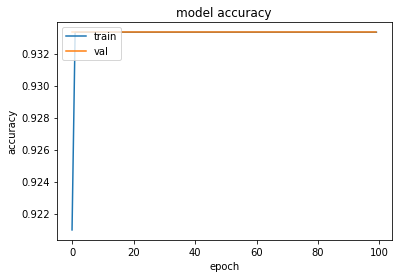

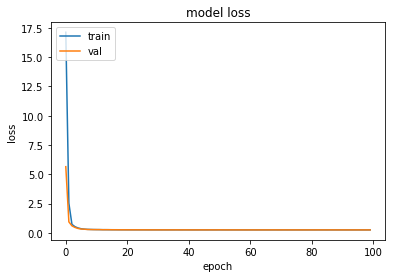

In [18]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()